<a href="https://colab.research.google.com/github/BoonthichaSaejia/Homework_Datacamp_1/blob/master/Day34_Neural%20Network/Day34_Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow import keras

## **Import Data**

In [2]:
from keras.datasets import mnist

## **Split Data**

In [49]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [50]:
x_train = x_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
x_test = x_test.reshape(10000, 28, 28, 1)

x_train = x_train.astype('float32')         # change integers to 32-bit floating point numbers
x_test = x_test.astype('float32')

x_train /= 255                              # normalize each value for each pixel for the entire vector for each input
x_test /= 255

In [51]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [52]:
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils  
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

In [53]:
nb_classes = 10 
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [54]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

In [55]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)       

In [56]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [58]:
train_generator = gen.flow(x_train, y_train, batch_size=128)
test_generator = test_gen.flow(x_test, y_test, batch_size=128)

In [60]:
history=model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=20, verbose=1, validation_data=test_generator, validation_steps=10000//128)

Epoch 1/20
  1/468 [..............................] - ETA: 25s - loss: 0.0555 - accuracy: 0.9922

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


468/468 [==============================] - 19s 40ms/step - loss: 0.0282 - accuracy: 0.9911 - val_loss: 0.0204 - val_accuracy: 0.9930
Epoch 2/20
468/468 [==============================] - 19s 40ms/step - loss: 0.0273 - accuracy: 0.9915 - val_loss: 0.0201 - val_accuracy: 0.9936
Epoch 3/20
468/468 [==============================] - 18s 39ms/step - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.0194 - val_accuracy: 0.9931
Epoch 4/20
468/468 [==============================] - 18s 38ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.0426 - val_accuracy: 0.9862
Epoch 5/20
468/468 [==============================] - 18s 38ms/step - loss: 0.0227 - accuracy: 0.9927 - val_loss: 0.0180 - val_accuracy: 0.9937
Epoch 6/20
468/468 [==============================] - 18s 39ms/step - loss: 0.0200 - accuracy: 0.9934 - val_loss: 0.0216 - val_accuracy: 0.9924
Epoch 7/20
468/468 [==============================] - 18s 38ms/step - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.0191 - val_accuracy: 0.9940
Epo

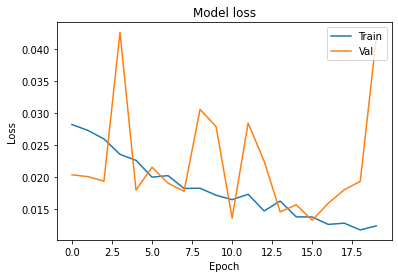

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

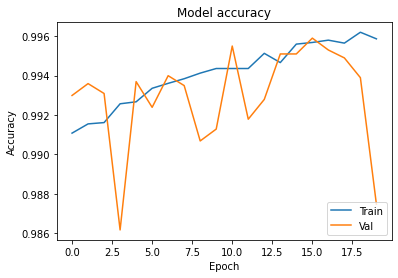

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()